# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

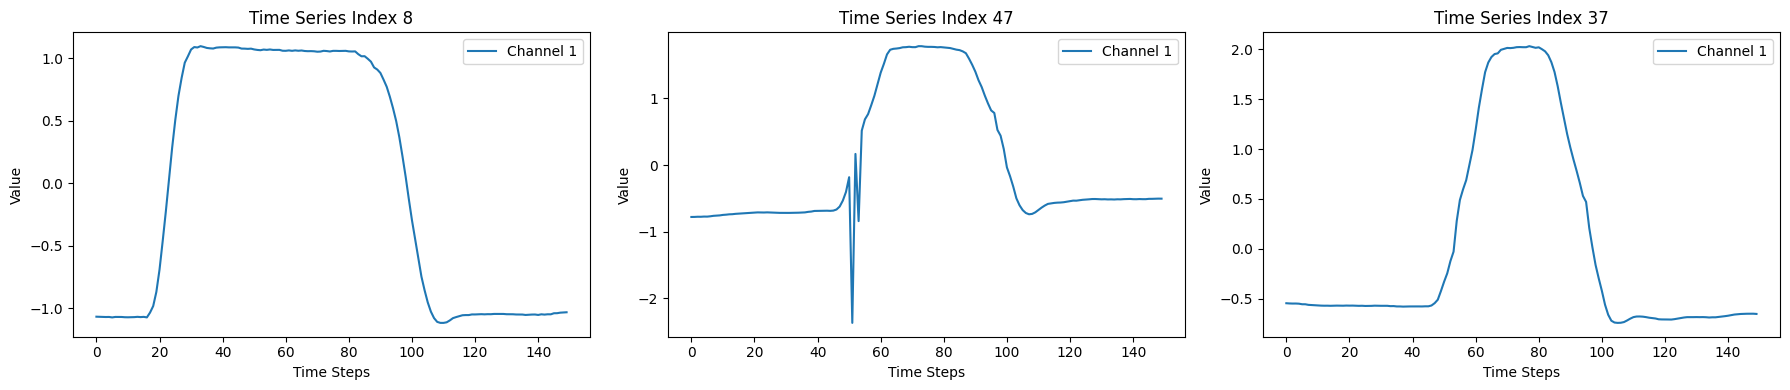

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.9036363636363636)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.7709090909090909)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9218181818181819)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9254545454545454)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8872727272727271)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.849090909090909)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9436363636363637))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[1.        , 0.42038563, 0.13911584, ..., 0.32057478, 0.06587537,
        0.17333724],
       [0.42038563, 1.        , 0.10721261, ..., 0.53330205, 0.10497067,
        0.17814076],
       [0.13911584, 0.10721261, 1.        , ..., 0.17789736, 0.31327566,
        0.0483783 ],
       ...,
       [0.32057478, 0.53330205, 0.17789736, ..., 1.        , 0.10124047,
        0.13068475],
       [0.06587537, 0.10497067, 0.31327566, ..., 0.10124047, 1.        ,
        0.04173754],
       [0.17333724, 0.17814076, 0.0483783 , ..., 0.13068475, 0.04173754,
        1.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [7]:
Xtrain.shape

(50, 1, 150)

In [8]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

REDCOMETS(static=array([[0.61635037, 0.0545111 , 0.29046977, ..., 0.50739063, 0.30872587,
        0.00838291],
       [0.00632124, 0.68090137, 0.13228993, ..., 0.64811169, 0.54826821,
        0.34416845],
       [0.3360731 , 0.17591624, 0.33864424, ..., 0.08588469, 0.35043042,
        0.17815546],
       ...,
       [0.28269249, 0.02978256, 0.96589949, ..., 0.10984163, 0.93810549,
        0.79682915],
       [0.28164387, 0.17676634, 0.89015627, ..., 0.95935673, 0.60095006,
        0.14708445],
       [0.98147893, 0.02733251, 0.6774258 , ..., 0.37259633, 0.39887584,
        0.20232084]]))

In [9]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[1.        , 0.35500616, 0.16495537, ..., 0.23380579, 0.11587104,
        0.23757772],
       [0.35500616, 1.        , 0.14616959, ..., 0.35787011, 0.14613266,
        0.27241151],
       [0.16495537, 0.14616959, 1.        , ..., 0.15479532, 0.43142813,
        0.08386119],
       ...,
       [0.23380579, 0.35787011, 0.15479532, ..., 1.        , 0.13557094,
        0.19215913],
       [0.11587104, 0.14613266, 0.43142813, ..., 0.13557094, 1.        ,
        0.09059249],
       [0.23757772, 0.27241151, 0.08386119, ..., 0.19215913, 0.09059249,
        1.        ]])

In [10]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])